In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from src.plots.latex import set_size, update_rcParams, HUE_ORDER

In [2]:
df = pd.read_parquet("../reports/width.parquet")
print(len(df))
df["acc_diff"] = df["Acc1"] - df["Acc2"]
df["err1"] = 1 - df["Acc1"]
df["err-mean"] = 1 - df["Acc-mean"]
print(df["Width"].unique())
df.head()

823200
[256 128  32   8  16  64]


,Dataset,Model,Value,Metric,Acc1,Acc2,Acc-mean,Acc-std,Val Size,Test Size,...,Init Seed 2,Split Seed,Width,Dropout,Layers,L2,Optimizer,acc_diff,err1,err-mean
0,CiteSeer,GCN2017,0.057,PI,0.698,0.696,0.69606,0.005077,0.15,0.8,...,1,0,256,0.6,2,0.0,Adam,0.002,0.302,0.30394
1,CiteSeer,GCN2017,0.050,PI,0.698,0.691,0.69606,0.005077,0.15,0.8,...,2,0,256,0.6,2,0.0,Adam,0.007,0.302,0.30394
2,CiteSeer,GCN2017,0.038,PI,0.698,0.692,0.69606,0.005077,0.15,0.8,...,3,0,256,0.6,2,0.0,Adam,0.006,0.302,0.30394
3,CiteSeer,GCN2017,0.048,PI,0.698,0.687,0.69606,0.005077,0.15,0.8,...,4,0,256,0.6,2,0.0,Adam,0.011,0.302,0.30394
4,CiteSeer,GCN2017,0.054,PI,0.698,0.699,0.69606,0.005077,0.15,0.8,...,5,0,256,0.6,2,0.0,Adam,-0.001,0.302,0.30394


## EDA

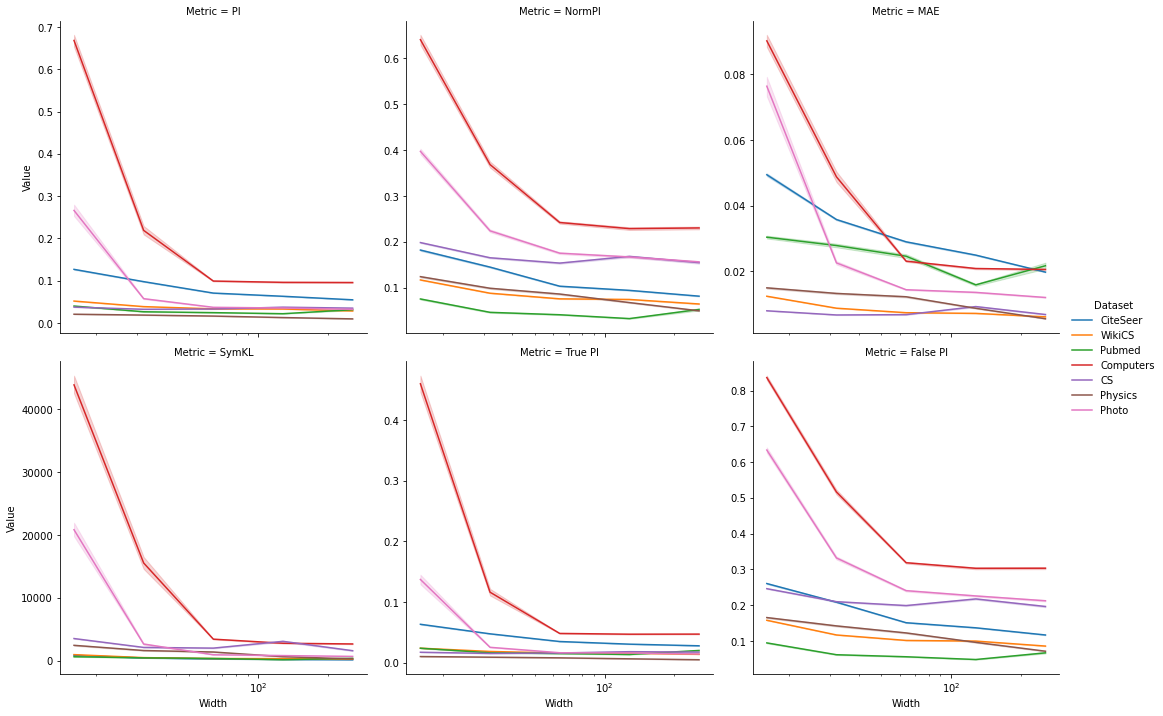

In [3]:
g = sns.relplot(
    data=df[(df.Model == "GCN2017") & (df.Width > 8)],
    x="Width",
    y="Value",
    hue="Dataset",
    col="Metric",
    kind="line",
    col_wrap=3,
    # ci="sd",
    facet_kws=dict(sharey=False)
)
g.set(xscale="log")

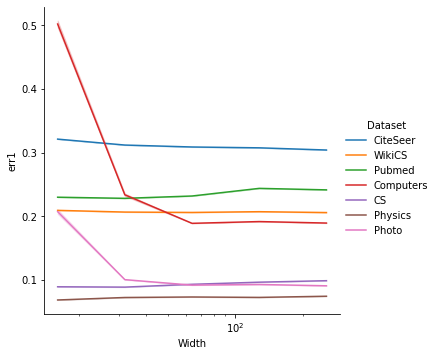

In [4]:
g = sns.relplot(
    data=df[(df.Model == "GCN2017") & (df.Width > 8)],
    x="Width",
    y="err1",
    hue="Dataset",
    kind="line",
    # ci="sd",
    facet_kws=dict(sharey=False)
)
g.set(xscale="log")

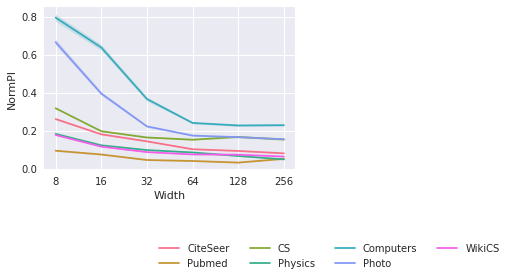

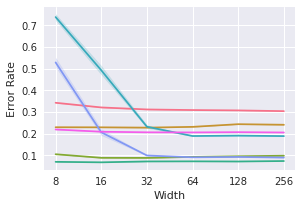

In [5]:
model = "GCN2017"
metric = "NormPI"
with plt.style.context("seaborn"):
    with plt.style.context({"axes.grid.which": "both"}):
        nrows, ncols = 1, 1
        # width, height = set_size(subplots=(nrows, ncols), fraction=1.)
        width, height = set_size(fraction=0.5)
        height = 3
        width = 1.5 * height
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
        # fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(height, width))

        pf = df.loc[(df["Metric"] == metric) & (df["Model"] == model)]
        sns.lineplot(
            data=pf,
            x="Width",
            y="Value",
            hue="Dataset",
            hue_order=HUE_ORDER,
            # rows="Model",
            legend=True,
            ci=99,
            ax=axes,
        )
        axes.set_xscale("log", base=2)
        # axes.set_yscale("log")
        # axes.set_yticks([0.03, 0.1, 0.5])
        axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        xticks = list(sorted(pf["Width"].unique()))
        axes.set_xticks(xticks)
        axes.set_xticklabels(xticks)
        # axes[0].set_title("Disagreement $d$")
        axes.set_ylabel(f"{metric}")
        # axes[0].set_ylabel("")
        lgd = axes.legend(
            loc="lower right",
            ncol=4, 
            bbox_to_anchor=(1.85, -0.66),
        )
        # fig.savefig(f"../reports/dropout1_{model}.pdf", bbox_inches="tight")
        
        
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
        sns.lineplot(
            data=pf,
            x="Width",
            y="err1",
            hue="Dataset",
            hue_order=HUE_ORDER,
            # style="Model",
            ci=99,
            ax=axes,
            legend=False
        )
        axes.set_xscale("log", base=2)
        # axes[1].set_yscale("log")
        xticks = list(sorted(pf["Width"].unique()))
        axes.set_xticks(xticks)
        axes.set_xticklabels(xticks)
        # axes.set_yscale("log")
        # axes.set_yticks([0.1, 0.2,0.3,0.4])
        axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        # axes[1].set_title("Error Rate")
        axes.set_ylabel("Error Rate")
        # axes[1].set_ylabel("")
        # fig.tight_layout()
        # fig.set_figheight(15)
        # lgd = axes[1].legend(
        #     loc="lower right",
        #     ncol=4, 
        #     bbox_to_anchor=(0.5, -0.76),
        # )
        # fig.savefig(f"../reports/dropout2_{model}.pdf", bbox_inches="tight")

## (Linear) Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

model = LinearRegression()
# model = RandomForestRegressor(random_state=0)
model = GradientBoostingRegressor(random_state=0)
idx = (df["Metric"] == "PI") & (df["Dataset"] == "Pubmed") & (df.Model == "GCN2017")
x = df.loc[idx, ["Width"]]
y = df.loc[idx, "Value"]

# x = df.loc[idx, ["Width"]]
# y = df.loc[idx, "Acc1"]
# strat = df.loc[idx, "Dataset"]
# strat = pd.qcut(df.loc[idx, "Value"], q=3)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.3, #stratify=strat
)

model.fit(x_train, y_train)
print(model.score(x_test, y_test))
# model.coef_

0.35934521542897313


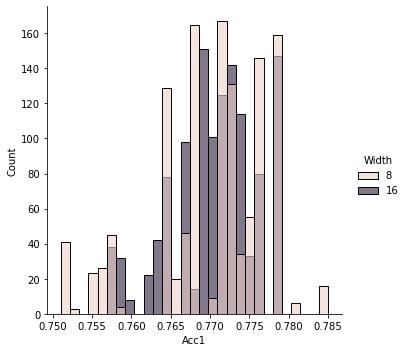

In [7]:
sns.displot(
    data=df.loc[idx & (df.Width.isin([8,16])), ["Acc1", "Width"]],
    x="Acc1",
    hue="Width",
    alpha=0.6
)

## Paper Plot

In [8]:
df.head(2)

,Dataset,Model,Value,Metric,Acc1,Acc2,Acc-mean,Acc-std,Val Size,Test Size,...,Init Seed 2,Split Seed,Width,Dropout,Layers,L2,Optimizer,acc_diff,err1,err-mean
0,CiteSeer,GCN2017,0.057,PI,0.698,0.696,0.69606,0.005077,0.15,0.8,...,1,0,256,0.6,2,0.0,Adam,0.002,0.302,0.30394
1,CiteSeer,GCN2017,0.050,PI,0.698,0.691,0.69606,0.005077,0.15,0.8,...,2,0,256,0.6,2,0.0,Adam,0.007,0.302,0.30394


In [ ]:
markers = ["X", "v", "o", "D", "s", "P", "^"]
for model in df["Model"].unique():
    with plt.style.context("seaborn"):
        with update_rcParams(
            {"axes.grid.which": "both", "lines.linewidth": 1, "lines.markersize": 4,}
        ):
            nrows, ncols = 1, 1
            # width, height = set_size(subplots=(nrows, ncols), fraction=1.)
            width, height = set_size(fraction=0.5)
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
            # fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(height, width))

            pf = df.loc[(df["Metric"] == "PI") & (df["Model"] == model)]
            sns.lineplot(
                data=pf,
                x="Width",
                y="Value",
                hue="Dataset",
                hue_order=HUE_ORDER,
                # style="Model",
                legend=True,
                ci=None,
                ax=axes,
                style="Dataset",
                markers=markers,
                style_order=HUE_ORDER,
                dashes=False,
            )
            axes.set_yscale("log")
            axes.set_yticks([0.01, 0.03, 0.1, 1.0])
            axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

            axes.set_xscale("log", base=2)
            xticks = list(sorted(pf["Width"].unique()))
            axes.set_xticks(xticks)
            axes.set_xticklabels(xticks)
            # axes[0].set_title("Disagreement $d$")
            axes.set_ylabel("Disagreement $d$")
            # axes[0].set_ylabel("")
            lgd = axes.legend(loc="lower right", ncol=4, bbox_to_anchor=(1.85, -0.66),)
            fig.savefig(f"../reports/width1_{model}.pdf", bbox_inches="tight")

            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
            sns.lineplot(
                data=pf,
                x="Width",
                y="err-mean",
                hue="Dataset",
                hue_order=HUE_ORDER,
                # style="Model",
                ci=None,
                ax=axes,
                legend=False,
                style="Dataset",
                markers=markers,
                style_order=HUE_ORDER,
                dashes=False,
            )
            axes.set_yscale("log")
            axes.set_yticks([0.07, 0.1, 0.3, 0.7])
            axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

            axes.set_xscale("log", base=2)
            xticks = list(sorted(pf["Width"].unique()))
            axes.set_xticks(xticks)
            axes.set_xticklabels(xticks)
            # axes[1].set_title("Error Rate")
            axes.set_ylabel("Error Rate")
            # axes[1].set_ylabel("")
            # fig.tight_layout()
            # fig.set_figheight(15)
            # lgd = axes[1].legend(
            #     loc="lower right",
            #     ncol=4,
            #     bbox_to_anchor=(0.5, -0.76),
            # )
            fig.savefig(f"../reports/width2_{model}.pdf", bbox_inches="tight")


In [ ]:
markers = ["X", "v", "o", "D", "s", "P", "^"]
for model in df["Model"].unique():
    with plt.style.context("seaborn"):
        with update_rcParams(
            {"axes.grid.which": "both", "lines.linewidth": 1, "lines.markersize": 4,}
        ):
            nrows, ncols = 1, 1
            # width, height = set_size(subplots=(nrows, ncols), fraction=1.)
            width, height = set_size(fraction=0.5)
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
            # fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(height, width))

            pf = df.loc[(df["Metric"] == "False PI") & (df["Model"] == model)]
            sns.lineplot(
                data=pf,
                x="Width",
                y="Value",
                hue="Dataset",
                hue_order=HUE_ORDER,
                # style="Model",
                legend=True,
                ci=None,
                ax=axes,
                style="Dataset",
                markers=markers,
                style_order=HUE_ORDER,
                dashes=False,
            )
            axes.set_yscale("log")
            axes.set_yticks([0.05, 0.1, 1.0])
            axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

            axes.set_xscale("log", base=2)
            xticks = list(sorted(pf["Width"].unique()))
            axes.set_xticks(xticks)
            axes.set_xticklabels(xticks)
            # axes[0].set_title("Disagreement $d$")
            axes.set_ylabel("False Disagr. $d_{False}$")
            # axes[0].set_ylabel("")
            lgd = axes.legend(loc="lower right", ncol=4, bbox_to_anchor=(1.85, -0.66),)
            fig.savefig(f"../reports/width1_{model}_fpi.pdf", bbox_inches="tight")

In [ ]:
markers = ["X", "v", "o", "D", "s", "P", "^"]
metric_to_name = {
    "PI": "Disagreement $d$",
    "NormPI": "Norm. Dis. $d_{Norm}$",
    "False PI": "False Dis. $d_{False}$",
    "True PI": "True Dis. $d_{True}$",
    "MAE": "MAE",
    "SymKL": "Symmetric KL-Div",
}

for model in df["Model"].unique():
    for metric in df["Metric"].unique():
        with plt.style.context("seaborn"):
            with update_rcParams(
                {
                    "axes.grid.which": "both",
                    "lines.linewidth": 1,
                    "lines.markersize": 4,
                }
            ):
                nrows, ncols = 1, 1
                # width, height = set_size(subplots=(nrows, ncols), fraction=1.)
                width, height = set_size(fraction=0.5)
                fig, axes = plt.subplots(
                    nrows=nrows, ncols=ncols, figsize=(width, height)
                )
                # fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(height, width))

                pf = df.loc[(df["Metric"] == metric) & (df["Model"] == model)]
                sns.lineplot(
                    data=pf,
                    x="Width",
                    y="Value",
                    hue="Dataset",
                    hue_order=HUE_ORDER,
                    # style="Model",
                    legend=True,
                    ci=None,
                    ax=axes,
                    style="Dataset",
                    markers=markers,
                    style_order=HUE_ORDER,
                    dashes=False,
                )
                axes.set_yscale("log")
                # axes.set_yticks([0.05, 0.1, 1.0])
                axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

                axes.set_xscale("log", base=2)
                xticks = list(sorted(pf["Width"].unique()))
                axes.set_xticks(xticks)
                axes.set_xticklabels(xticks)
                # axes[0].set_title("Disagreement $d$")
                axes.set_ylabel(metric_to_name[metric])
                # axes.set_ylabel("False Disagr. $d_{False}$")
                # axes[0].set_ylabel("")
                lgd = axes.legend(loc="lower right", ncol=3, bbox_to_anchor=(1, -0.7),)
                fig.savefig(f"../reports/appendix/width1_{model}_{metric}.pdf", bbox_inches="tight")
